## Import libraries

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traind=open(r"C:\Users\NUTHETI SRI LAASYA\Documents\Datasets\Titanic\train.csv")
testd=open(r"C:\Users\NUTHETI SRI LAASYA\Documents\Datasets\Titanic\test.csv")

train=pd.read_csv(traind)
test=pd.read_csv(testd)
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
train.shape

(891, 12)

In [122]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
train = train.drop('Name', axis=1,)
train = train.drop('Ticket', axis=1,)
train = train.drop('Fare', axis=1,)
train = train.drop('Cabin', axis=1,)

In [124]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [125]:
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [126]:
train = train.drop('SibSp', axis=1,)
train = train.drop('Parch', axis=1,)

In [127]:
train["Age"] = train["Age"].astype(np.float16)
train["Age"] = (train["Age"].fillna(train["Age"].median()))
embarkedmode=(train["Embarked"].mode())
train["Embarked"] = train["Embarked"].fillna("S")

In [128]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family         0
dtype: int64

In [129]:
#train["Age"].describe()
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float16

In [133]:
train["Adult"] = 0

In [134]:
train["Adult"][train["Age"] >= 18] = 1

C:\Users\NUTHETI SRI LAASYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
print ("Passengers more than 18 yrs old: ",str(len(train[train["Age"] >= 18])))
print ("Number of Adults: ",str(len(train[train["Adult"] >= 1])))

Passengers more than 18 yrs old:  778
Number of Adults:  778


In [139]:
train = train.drop('Age', axis=1,)

## Data VIsualization

In [153]:
def stats (param1, param2):
    slice = train[[param1, param2, 'PassengerId']]
    slice_pivot = slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

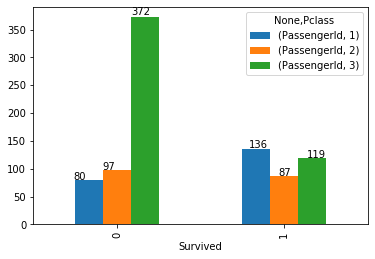

In [163]:
stats("Survived","Pclass")

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

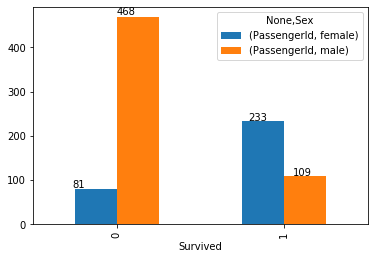

In [155]:
stats("Survived","Sex")

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

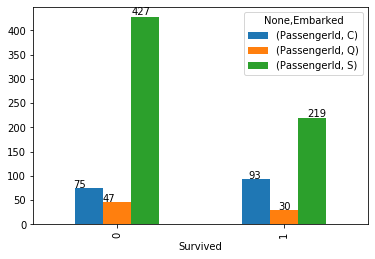

In [156]:
stats("Survived","Embarked")

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

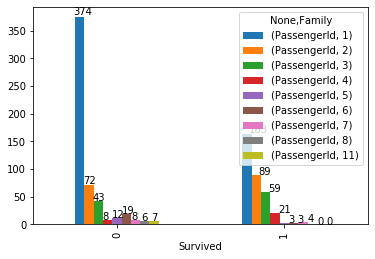

In [157]:
stats("Survived","Family")

PassengerId     
Adult              0    1
Survived                 
0                 52  497
1                 61  281

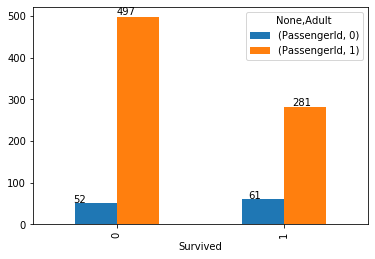

In [147]:
make_pivot("Survived","Adult")